# WalkForward Testing

Overview : 
More systematic approach to testing the rough architecture of the system.

## Imports

In [1]:
from os import listdir
from ta import *
import pandas, numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from importlib import reload 

In [2]:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [4]:
import utils

## Read Data

In [5]:
data_dir = 'data/histdata/'

In [6]:
pairs = utils.listCurrenciesInDir(data_dir)
pairs

['AUDJPY',
 'EURAUD',
 'EURCAD',
 'EURGBP',
 'EURUSD',
 'GBPUSD',
 'USDCAD',
 'USDJPY',
 'USDMXN']

In [7]:
results = []
for pair in pairs:
    print('Executing : ', pair)
    tmpRes = utils.runDTBacktest(utils.readAllDatForCurrency(data_dir, pair),
                            filename=pair,
                            output_calculators=[lambda s : utils.calcSmoothedGains(s, 30, 6*60)],
                            make_trades=lambda preds : utils.stdConfidenceTrades(preds, buy_confidence=1.5, sell_confidence=1.1),
                            calc_gains=utils.getBuySellGains)
    results.append(tmpRes)

sortedResults = sorted(list(map(utils.getSummary, results)), key=lambda x: x['gain'])
sortedResults.reverse()
sortedResults

Executing :  AUDJPY


/Users/amclean/workspace/projects/fxboys/utils.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_out['preds'] = preds


Executing :  EURAUD
Executing :  EURCAD
Executing :  EURGBP
Executing :  EURUSD
Executing :  GBPUSD
Executing :  USDCAD
Executing :  USDJPY
Executing :  USDMXN


[{'filename': 'EURAUD',
  'gain': 3.4289965505502598,
  'total_gain': 1.00804885162684,
  'beat_market': True,
  'start_date': '2018.09.04',
  'end_date': '2018.09.14'},
 {'filename': 'GBPUSD',
  'gain': 1.0565089407469401,
  'total_gain': 1.016709041854222,
  'beat_market': True,
  'start_date': '2018.09.04',
  'end_date': '2018.09.14'},
 {'filename': 'EURCAD',
  'gain': 1.0490173566802357,
  'total_gain': 0.9962211263270248,
  'beat_market': True,
  'start_date': '2018.09.04',
  'end_date': '2018.09.14'},
 {'filename': 'EURUSD',
  'gain': 1.0255692654527335,
  'total_gain': 0.9973328090137368,
  'beat_market': True,
  'start_date': '2018.08.29',
  'end_date': '2018.09.14'},
 {'filename': 'USDCAD',
  'gain': 1.0086250747115206,
  'total_gain': 0.9896361648495172,
  'beat_market': True,
  'start_date': '2018.09.04',
  'end_date': '2018.09.14'},
 {'filename': 'AUDJPY',
  'gain': 1.0079277439429302,
  'total_gain': 1.000385241521579,
  'beat_market': True,
  'start_date': '2018.09.04',
 

In [8]:
df = results[3]['df']

In [9]:
numWalks = 10
train_split = 0.85

"""
length = sampLen*train_split + numWalks*sampLen*(1.0 - 0.85)
length = sampLen * (train_split + numWalks*(1.0 - 0.85))
"""
sampLen = len(df) / (train_split + numWalks*(1.0 - train_split))
sampLen = int(sampLen)

In [10]:
(len(df) - sampLen*train_split)/(sampLen*(1.-train_split))

10.000029234637198

In [11]:
def walkForwardInds(df, num_tests, train_split):
    sampLen = len(df) / (train_split + num_tests*(1.0 - train_split))
    sampLen = int(sampLen)
    test_len = int(sampLen * (1.-train_split))
    
    splits = []
    for i in range(num_tests):
        start = test_len*i
        end = start + sampLen
        splits.append((start, end))
    return splits

In [12]:
splits = walkForwardInds(df, 10, 0.85)

In [13]:
allDf = utils.readAllDatForCurrency(data_dir, 'USDCAD')
results = []
for pair in splits:
    print('Executing : ', pair)
    tmpRes = utils.runDTBacktest(allDf[pair[0]:pair[1]],
                            filename=pair,
                            output_calculators=[lambda s : utils.calcSmoothedGains(s, 30, 6*60)],
                            make_trades=lambda preds : utils.stdConfidenceTrades(preds, buy_confidence=1.5, sell_confidence=1.1),
                            calc_gains=utils.getBuySellGains)
    results.append(tmpRes)

summaryRes = list(map(utils.getSummary, results))
summaryRes

Executing :  (0, 45608)


/Users/amclean/workspace/projects/fxboys/utils.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_out['preds'] = preds


Executing :  (6841, 52449)
Executing :  (13682, 59290)
Executing :  (20523, 66131)
Executing :  (27364, 72972)
Executing :  (34205, 79813)
Executing :  (41046, 86654)
Executing :  (47887, 93495)
Executing :  (54728, 100336)
Executing :  (61569, 107177)


[{'filename': (0, 45608),
  'gain': 0.8931652235927,
  'total_gain': 0.9946843149429805,
  'beat_market': False,
  'start_date': '2018.07.11',
  'end_date': '2018.07.16'},
 {'filename': (6841, 52449),
  'gain': 1.0621577209558357,
  'total_gain': 0.9976734845442021,
  'beat_market': True,
  'start_date': '2018.07.18',
  'end_date': '2018.07.23'},
 {'filename': (13682, 59290),
  'gain': 1.004121606486478,
  'total_gain': 0.9915805674926096,
  'beat_market': True,
  'start_date': '2018.07.25',
  'end_date': '2018.07.30'},
 {'filename': (20523, 66131),
  'gain': 1.1030169523377287,
  'total_gain': 1.0008682089540868,
  'beat_market': True,
  'start_date': '2018.08.01',
  'end_date': '2018.08.06'},
 {'filename': (27364, 72972),
  'gain': 1.0996421722215874,
  'total_gain': 1.0083204364015255,
  'beat_market': True,
  'start_date': '2018.08.07',
  'end_date': '2018.08.13'},
 {'filename': (34205, 79813),
  'gain': 1.0612918116479586,
  'total_gain': 1.00018380945089,
  'beat_market': True,
 

In [14]:
curResult = results[-2]

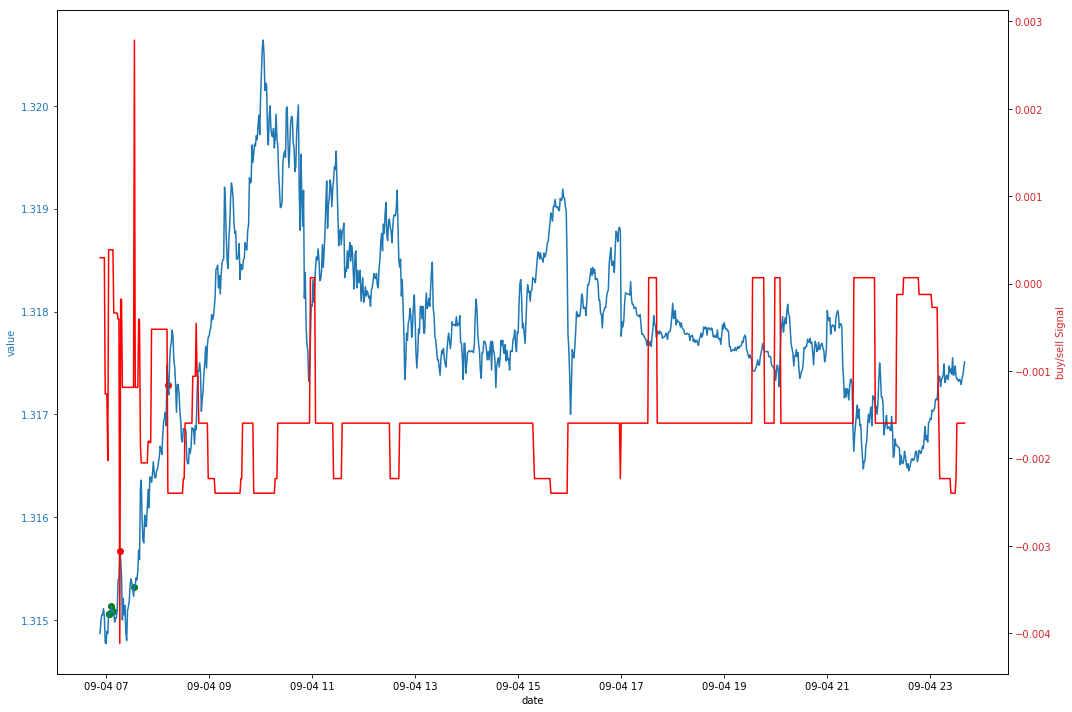

In [15]:
utils.plotResult(curResult, 0, 1000)

## Rolling Std for Placing Trades

In [16]:
pandas.Series(curResult['preds']).rolling(20).std()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19      0.000737
20      0.000730
21      0.000723
22      0.000713
23      0.001108
24      0.001096
25      0.001082
26      0.001080
27      0.001077
28      0.001075
29      0.001028
          ...   
4493    0.000602
4494    0.000677
4495    0.000735
4496    0.000733
4497    0.000721
4498    0.000713
4499    0.000809
4500    0.000900
4501    0.000975
4502    0.001040
4503    0.001015
4504    0.000987
4505    0.000968
4506    0.001189
4507    0.001362
4508    0.001364
4509    0.001366
4510    0.001377
4511    0.001377
4512    0.001351
4513    0.001322
4514    0.001285
4515    0.001239
4516    0.001240
4517    0.001247
4518    0.001241
4519    0.001199
4520    0.0011

In [17]:
def rollingStdConfTrades(predictions, window=40, buy_confidence=1.5, sell_confidence=1.1):
    preds = pandas.Series(predictions)
    mean = preds.mean()
    std = preds.std()
    predsMean = preds.rolling(window).mean().fillna(mean)
    predsStd = preds.rolling(window).std().fillna(std)

    buy_thresh = predsMean + np.multiply(predsStd, buy_confidence)
    sell_thresh = predsMean - np.multiply(predsStd, sell_confidence)

    buy_positions = np.where((preds > buy_thresh) == True)[0]
    sell_positions = np.where((preds < sell_thresh) == True)[0]

    sells = []
    curSell = 0
    for curBuy in buy_positions:
        arr = np.where(sell_positions > curBuy)[0]
        if len(arr):
            sells.append(sell_positions[arr[0]])
    tradePairs = list(zip(buy_positions, sells))
    return tradePairs

In [29]:
allDf = utils.readAllDatForCurrency(data_dir, 'USDCAD')
results = []
for pair in splits:
    print('Executing : ', pair)
    tmpRes = utils.runDTBacktest(allDf[pair[0]:pair[1]],
                            filename=pair,
                            output_calculators=[lambda s : utils.calcSmoothedGains(s, 30, 6*60)],
                            make_trades=lambda preds : rollingStdConfTrades(preds, window=100, buy_confidence=1.5, sell_confidence=0.1),
                            calc_gains=utils.getBuySellGains)
    results.append(tmpRes)

summaryRes = list(map(utils.getSummary, results))
summaryRes

Executing :  (0, 45608)


/Users/amclean/workspace/projects/fxboys/utils.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_out['preds'] = preds


Executing :  (6841, 52449)
Executing :  (13682, 59290)
Executing :  (20523, 66131)
Executing :  (27364, 72972)
Executing :  (34205, 79813)
Executing :  (41046, 86654)
Executing :  (47887, 93495)
Executing :  (54728, 100336)
Executing :  (61569, 107177)


[{'filename': (0, 45608),
  'gain': 0.9817159471117726,
  'total_gain': 0.9946843149429805,
  'beat_market': False,
  'start_date': '2018.07.11',
  'end_date': '2018.07.16'},
 {'filename': (6841, 52449),
  'gain': 1.0045007938533799,
  'total_gain': 0.9976734845442021,
  'beat_market': True,
  'start_date': '2018.07.18',
  'end_date': '2018.07.23'},
 {'filename': (13682, 59290),
  'gain': 0.9875496986833503,
  'total_gain': 0.9915805674926096,
  'beat_market': False,
  'start_date': '2018.07.25',
  'end_date': '2018.07.30'},
 {'filename': (20523, 66131),
  'gain': 2.7150629095340846,
  'total_gain': 1.0008682089540868,
  'beat_market': True,
  'start_date': '2018.08.01',
  'end_date': '2018.08.06'},
 {'filename': (27364, 72972),
  'gain': 1.0239242007084313,
  'total_gain': 1.0083204364015255,
  'beat_market': True,
  'start_date': '2018.08.07',
  'end_date': '2018.08.13'},
 {'filename': (34205, 79813),
  'gain': 0.9779790894973595,
  'total_gain': 1.00018380945089,
  'beat_market': Fa

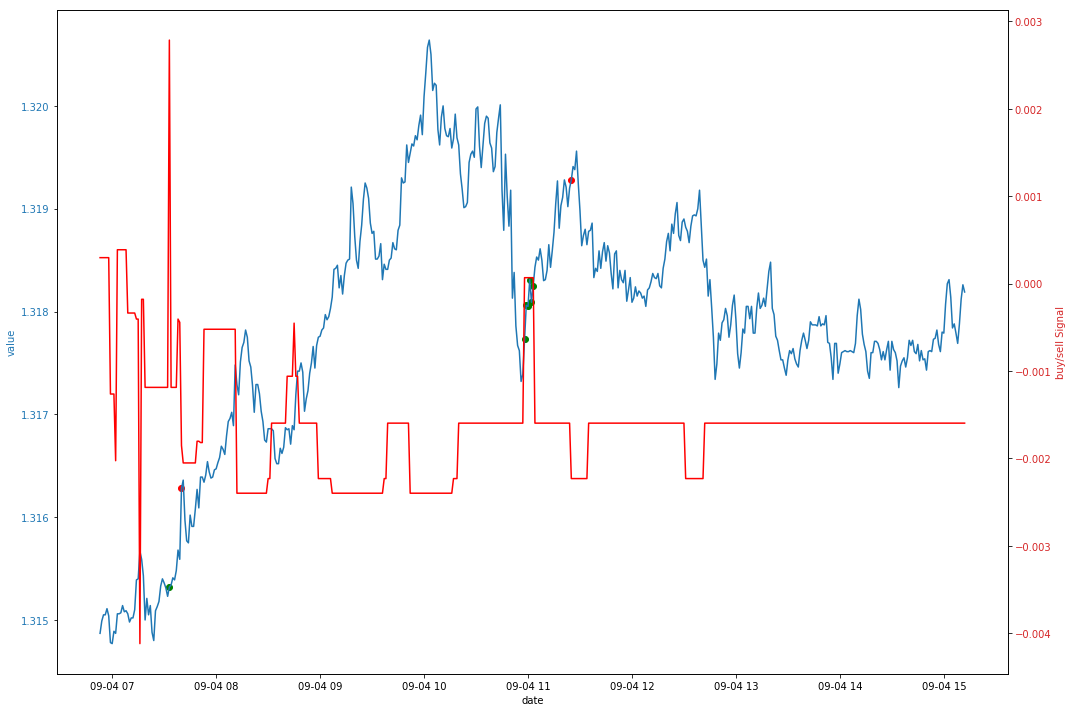

In [31]:
utils.plotResult(results[-2], 0, 500)